<a href="https://colab.research.google.com/github/aryankargwal/Color-Segmentation-using-OpenCV/blob/master/Colour_Segmentation_using_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Colour Segmentation using OpenCv
Colour Segmentation is an image analysis task of seperating certain ranges of colours from an image.
Similar to what us humans do all the time by default, when are looking then whatever we are seeing if we think of that as an image then we know what colour each pixel of an image belongs to.


# Usage and Efficiency
Colours segmentation is a highly efficient way of segmenting an object from an image without using advanced tools like Semantic Segmentation and Edge Detection.
Since Colour segmentation can be achieved using only OpenCV it is way faster than other counterpart ways of segmenting an object.

Colours Segmentation can be used segmenting object from a uniform backgorund like colourful birds and fishes from their natural habitats and tumours in body. 


# Example Code
Now I will be talking about a detailed code on how colour segmentation can be achieved using OpenCV.


> Loading the image  and plotting it for scale.



2020-06-20 13:38:29 URL:https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg [182965/182965] -> "birb.png" [1]


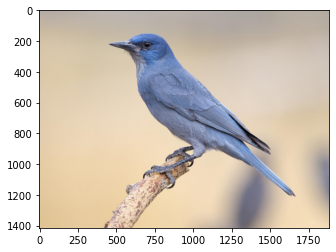

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
!wget -nv https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg -O bird.png
img = Image.open('./bird.png')
plt.imshow(img)
plt.show()



> Main code

We will run the image through a number of filters to remove traffic from the image and identify and set some threshold values for the colour of the object we want to extract by hit and trial, the result achieved by this can be fine tuned by playing with the RGB values of the threshold.



In [ ]:
from google.colab.patches import cv2_imshow
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
img=cv.imread('birb.png')


##filters for pics
blur = cv.blur(img,(5,5))
blur0=cv.medianBlur(blur,5)
blur1= cv.GaussianBlur(blur0,(5,5),0)
blur2= cv.bilateralFilter(blur1,9,75,75)


##conversions of pics
hsv = cv.cvtColor(blur2, cv.COLOR_BGR2HSV)
gray = cv.cvtColor(blur2, cv.COLOR_BGR2GRAY) 
ret, thresh = cv.threshold(gray, 127, 255, 0)



##for blue
low_blue = np.array([55, 0, 0])
high_blue = np.array([118, 255, 255])
mask = cv.inRange(hsv, low_blue, high_blue)

contours, _=cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

res = cv.bitwise_and(img,img, mask= mask)
res1=cv.cvtColor(res, cv.COLOR_BGR2RGB)

This process can be however simplified by identifying the threshold values for the background incase of an uniform background and inversing the mask by the **cv2.bitwise_not(mask)** inbuilt function in OpenCV.

In [ ]:
scale_percent = 15 # percent of original size
width = int(res1.shape[1] * scale_percent / 100)
height = int(res1.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized_mask = cv.resize(res1, dim, interpolation = cv.INTER_AREA) 
scale_percent = 15 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
img1 = cv.resize(img, dim, interpolation = cv.INTER_AREA) 

Now we will output the resultant segmented image with the orignal picture for comparison.



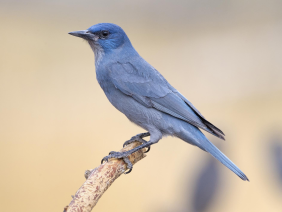

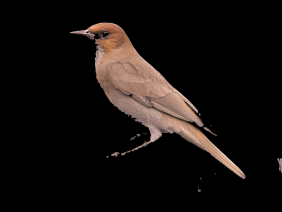

In [ ]:
cv2_imshow(img1)
cv2_imshow(resized_mask)

# Ending Notes
As seen in the resultant image there can be certain traffic in the image which may be identified as of the same colour this discrepancy however wont matter much if we intend to further extend the code to put bounding boxes and labeling these objects by putting a condition on the areas of the contours.

